# Cross Section

Calculate a cross section through a variable

In [1]:
import sys
sys.path.append('..')
import aus400
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
# Start a Dask distributed client if running on Gadi so memory limits are respected
import climtas.nci
climtas.nci.GadiClient()

Client Scheduler: tcp://127.0.0.1:32953 Dashboard: /proxy/8787/status,Cluster Workers: 1 Cores: 1 Memory: 4.00 GiB


In [3]:
ta = aus400.load_var(resolution='d0198', stream='mdl', variable='air_temp', ensemble=0, time='20170327T0000')

The function 'cross_section' will create a cross section through aus400 data

In [4]:
mel = (144.96, -37.81)
syd = (151.2, -33.87)

cross = aus400.cross_sec.cross_sec(ta, *mel, *syd)
cross

<xarray.DataArray 'air_temp' (ensemble: 1, time: 1, model_level_number: 90, horz_dim: 316)>
dask.array<dask_aware_interpnd, shape=(1, 1, 90, 316), dtype=float32, chunksize=(1, 1, 1, 316), chunktype=numpy.ndarray>
Coordinates:
  * time                     (time) datetime64[ns] 2017-03-27T01:00:00
  * model_level_number       (model_level_number) int32 1 2 3 4 ... 87 88 89 90
    forecast_period          timedelta64[ns] ...
    forecast_reference_time  datetime64[ns] ...
    level_height             (model_level_number) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    sigma                    (model_level_number) float64 dask.array<chunksize=(1,), meta=np.ndarray>
  * ensemble                 (ensemble) int64 0
    longitude                (horz_dim) float64 145.0 145.0 ... 151.2 151.2
    latitude                 (horz_dim) float64 -37.8 -37.79 ... -33.89 -33.88
Dimensions without coordinates: horz_dim
Attributes:
    standard_name:           air_temperature
    units:                   K
    source:                  Data from Met Office Unified Model
    um_version:              11.4
    STASH:                   [ 1 16  4]
    um_stash_source:         m01s16i004
    long_name:               TEMPERATURE ON THETA LEVELS
    stash_code:              16004
    wgdos_packing_accuracy:  2^-3
    resolution:              d0198
    stream:                  mdl

Plotting the cross section track on a map using the latitude and longitude coordinates

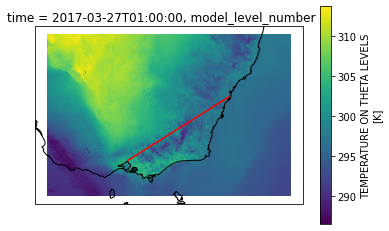

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
ta.sel(latitude=slice(-40, -30), longitude=slice(140,155), model_level_number=1).squeeze().plot(ax=ax)

ax.plot(cross.longitude, cross.latitude, color='r')

ax.coastlines();

Plotting the cross section on model levels

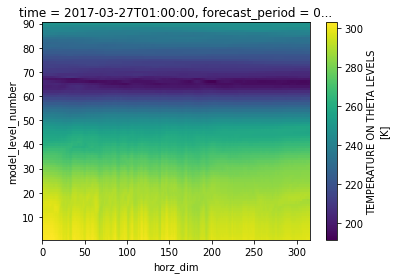

In [6]:
cross.squeeze().plot();

The vertical interpolation routines can also be used on cross section data

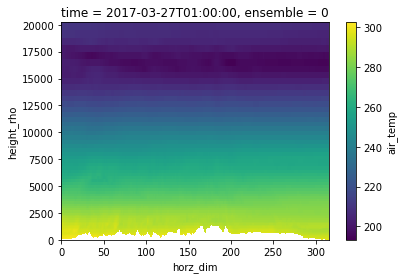

In [7]:
aus400.vertical.to_height(cross, ta.level_height.values[:70]).squeeze().plot.pcolormesh('horz_dim', 'height_rho');